In [2]:
%matplotlib inline
import matplotlib as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd

# Line charts

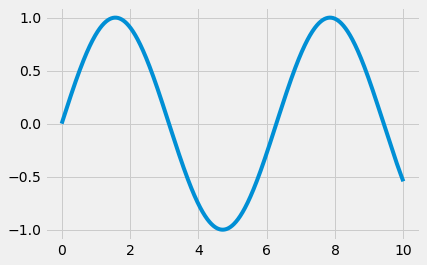

In [2]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

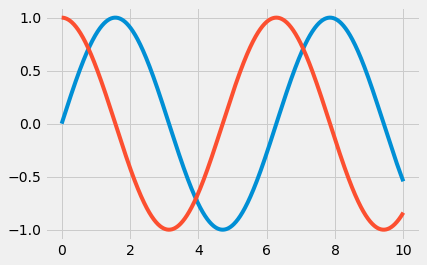

In [3]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

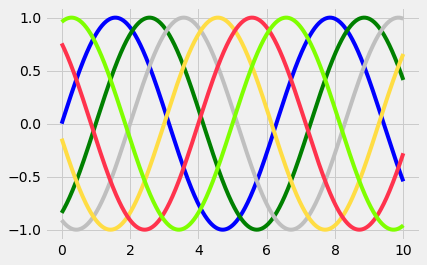

In [4]:
# color keyword
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names

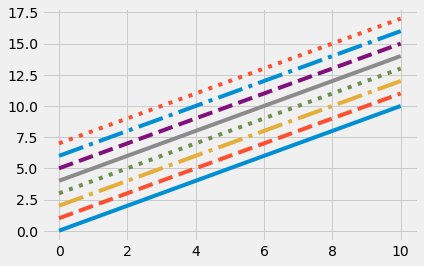

In [5]:
# linestyle keyword
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

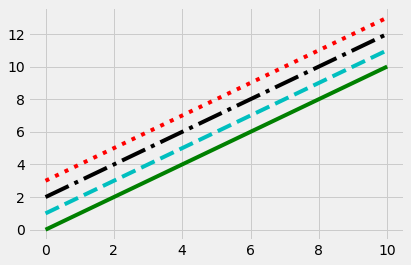

In [6]:
#combined non-key fmt argument

plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

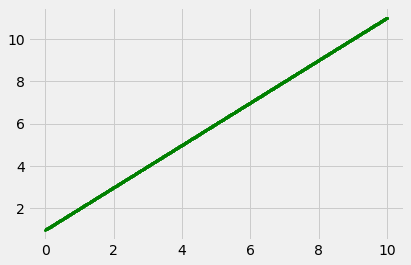

In [7]:
 # (color='green', marker='o', linestyle='dashed') = 'go--'
plt.plot(x, x+1, 'go--', linewidth=2, markersize=2)

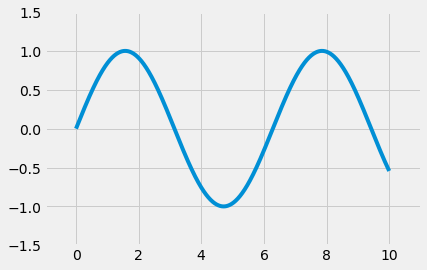

In [8]:
# axes limits
plt.plot(x, np.sin(x))
# = plt.axis([xmin, xmax, ymin, ymax])
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

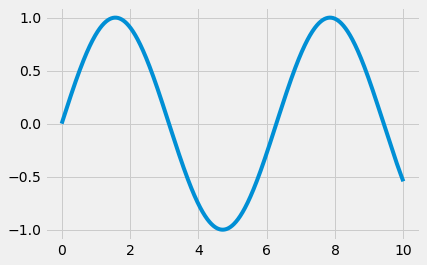

In [9]:
plt.plot(x, np.sin(x))
plt.axis('tight');

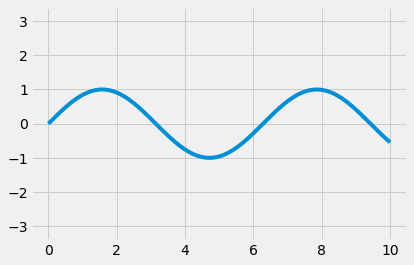

In [10]:
plt.plot(x, np.sin(x))
plt.axis('equal');

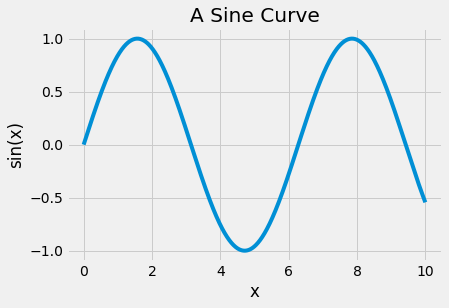

In [11]:
#labels and titles
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

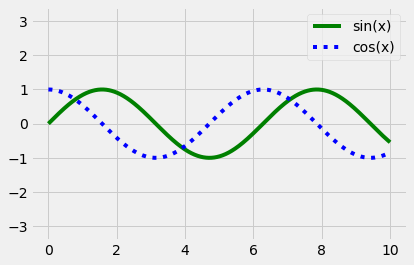

In [12]:
# add legend and labels to plots
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Difference in plt functions vs ax methods!!!

 - plt.xlabel() → ax.set_xlabel()
 - plt.ylabel() → ax.set_ylabel()
 - plt.xlim() → ax.set_xlim()
 - plt.ylim() → ax.set_ylim()
 - plt.title() → ax.set_title()
 In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ax.set() method to set all these properties at once:

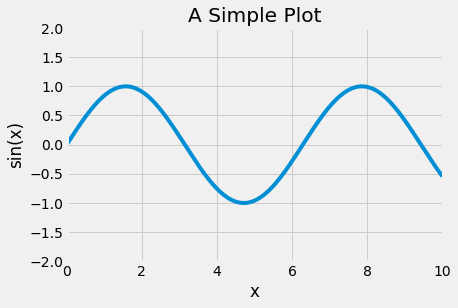

In [13]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Scatterplots

Same as line chart but we need specify marker type

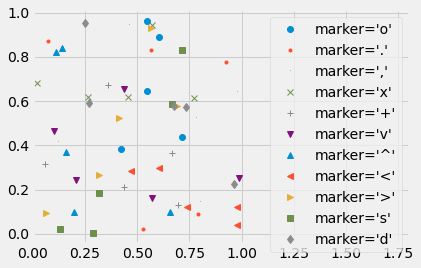

In [14]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

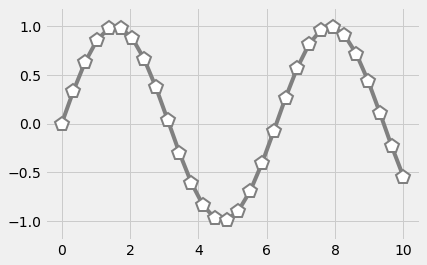

In [15]:
# additional keyword arguments
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Plt.scatter

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

BUT ! plt.plot should be preferred over plt.scatter for large datasets.

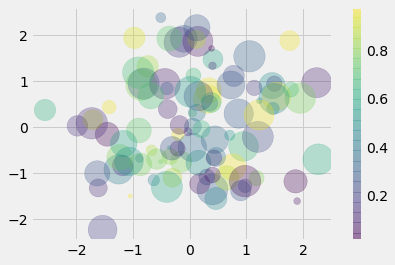

In [16]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

## Visualizing Errors
### Basic errorbars

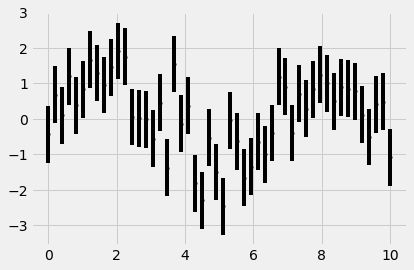

In [17]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');


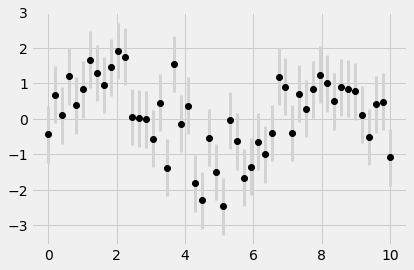

In [18]:
# customize lines of errorbar
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

### Continuous errorbars

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region


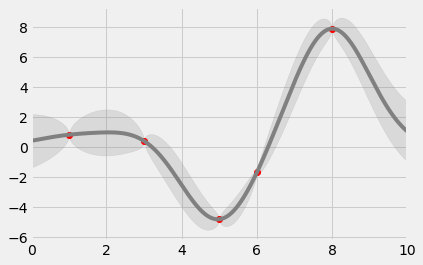

In [20]:
# plt.fill_between function
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

## Density and Contour Plots
Display three-dimensional data in two dimensions. 3 functions: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow` for showing images.

In [21]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#np.meshgrid function builds two-dimensional grids from one-dimensional arrays
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

**plt.contour function**
It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels.

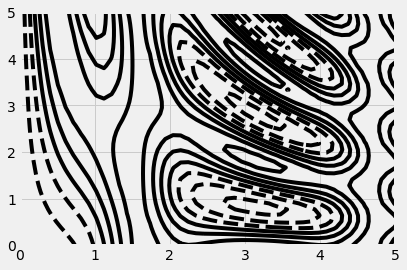

In [22]:
#negative numbers as dashed lines, positive - as solid
plt.contour(X, Y, Z, colors='black');

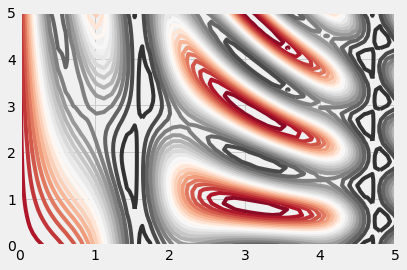

In [23]:
#specify a colormap with the cmap argument
plt.contour(X, Y, Z, 20, cmap='RdGy');
#check colormaps with plt.cm.<TAB>

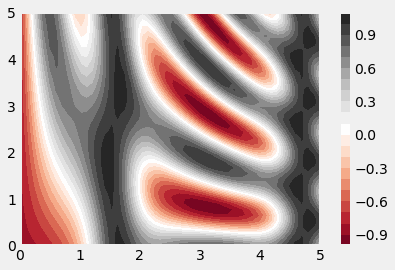

In [24]:
#contourf fills gaps between lines, add colorbar
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

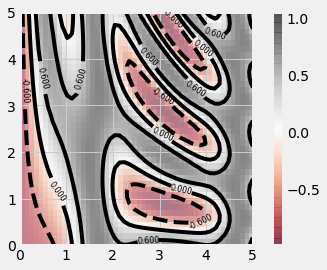

In [25]:
# combine with contour plot with alpfa parameter
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

## Histograms, Binnings, and Density


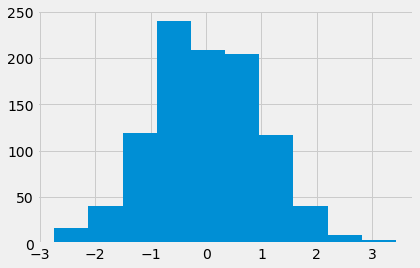

In [26]:
data = np.random.randn(1000)
plt.hist(data);

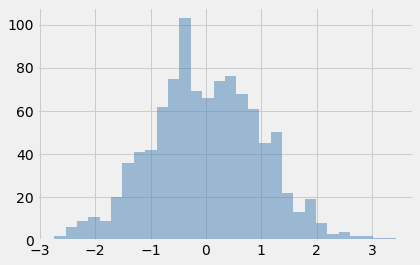

In [27]:
# customised histogram
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

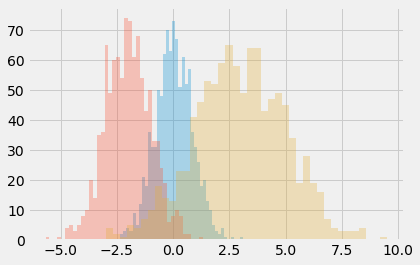

In [28]:
#compare several histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

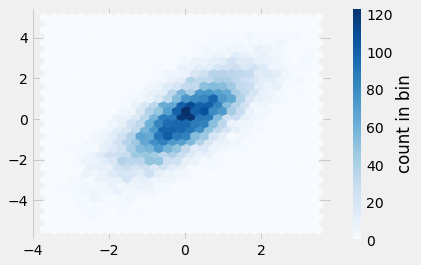

In [29]:
#two-dimensional histogram with plt.hexbin
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')


## Customizing Plot Legends
plt.legend docsting for args and kwargs


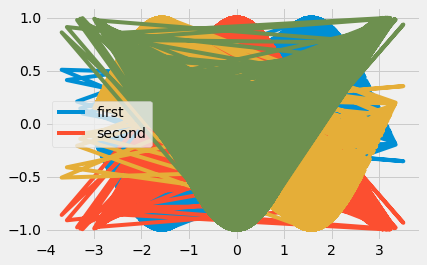

In [30]:
# choose elemants from the legend

y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

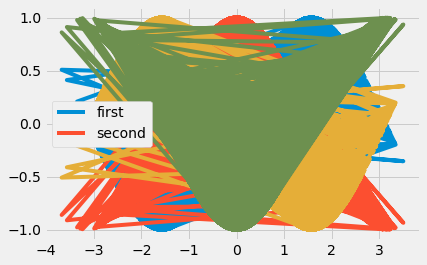

In [31]:
#better add labels to plot data
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

with kwarg `scatterpoints` we can add in legend size labels for points
The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

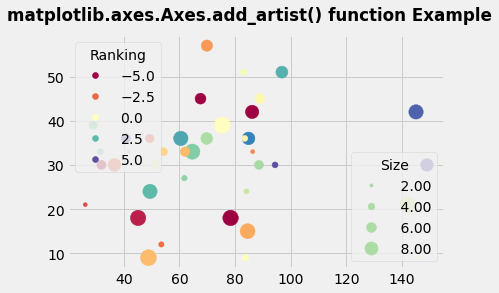

In [32]:
# add_artist(legend) to add second legend
# Implementation of matplotlib function
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt
  
volume = np.random.rayleigh(27, size = 40)
amount = np.random.poisson(10, size = 40)
ranking = np.random.normal(size = 40)
price = np.random.uniform(1, 10, size = 40)
  
fig, ax = plt.subplots()
  
scatter = ax.scatter(volume * 2, amount * 3,
                     c = ranking * 3, 
                     s = 0.3*(price * 3)**2,
                     vmin =-4, vmax = 4,
                     cmap ="Spectral")
  
legend1 = ax.legend(*scatter.legend_elements(num = 5),
                    loc ="upper left", 
                    title ="Ranking")
  
ax.add_artist(legend1)
  
kw = dict(prop ="sizes", num = 5,
          color = scatter.cmap(0.7),
          fmt =" {x:.2f}",
          func = lambda s: np.sqrt(s/.3)/3)
  
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc ="lower right",
                    title ="Size")
  
fig.suptitle('matplotlib.axes.Axes.add_artist() \
function Example\n\n', fontweight ="bold")
plt.show()

## Customize colorbars
 In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot. 

In [33]:
plt.style.use('classic')

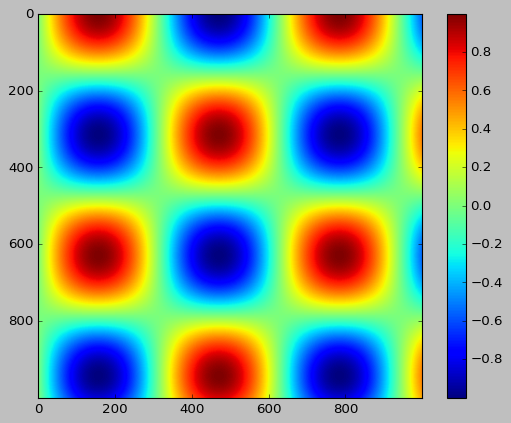

In [34]:
#plt.colorbar() function
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

### Choose a colormap

 - Sequential colormaps: These are made up of one continuous sequence of colors (e.g., binary or viridis).
 - Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).
 - Qualitative colormaps: these mix colors with no particular sequence (e.g., rainbow or jet).

### Limits and extents of colorbar

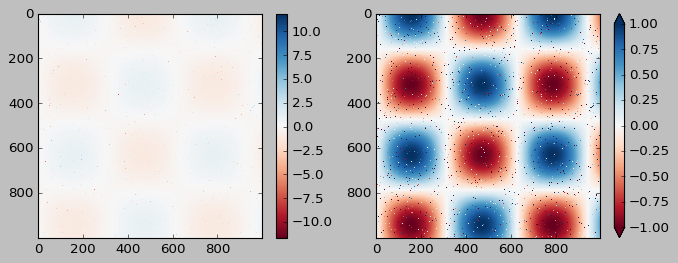

In [35]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
#extend property of colorbar and clim
plt.colorbar(extend='both')
plt.clim(-1, 1);

### Descreet color bars
use the plt.cm.get_cmap() function, and pass the name of a suitable colormap along with the number of desired bins

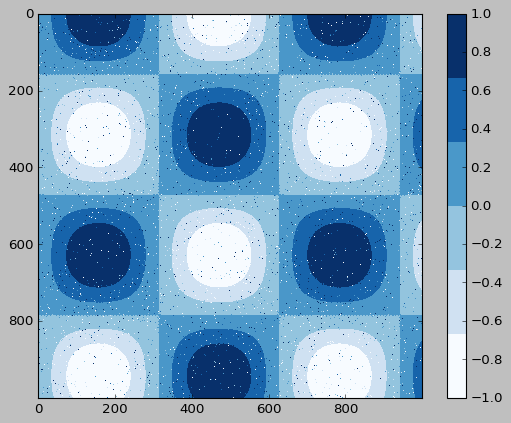

In [36]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Multiple subplots

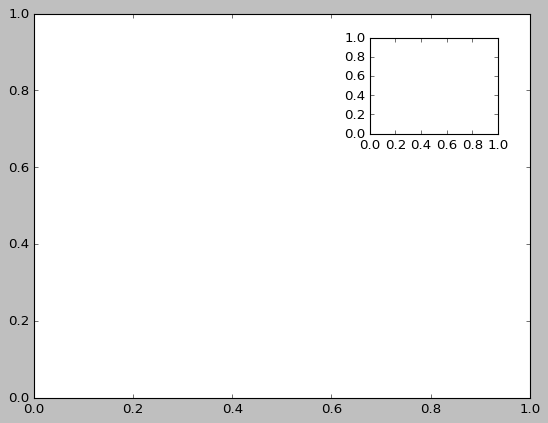

In [37]:
#For high-level function - plt.axes() with optional argument [left, bottom, width, height]
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

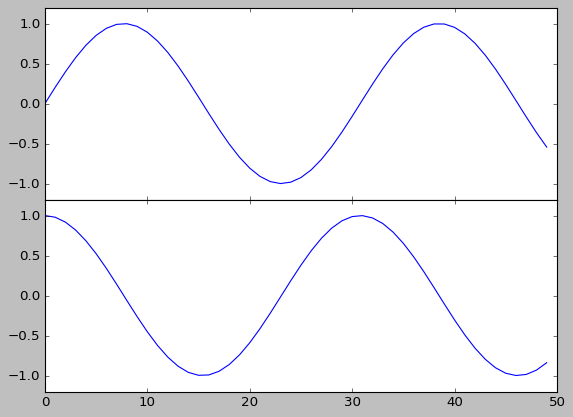

In [38]:
# object-oriented = fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## Grid of subplots
plt.subplots() is the easier tool to use, creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords sharex and sharey, which allow you to specify the relationships between different axes.

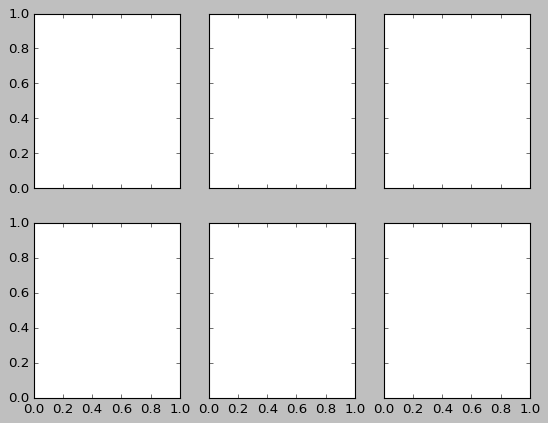

In [39]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

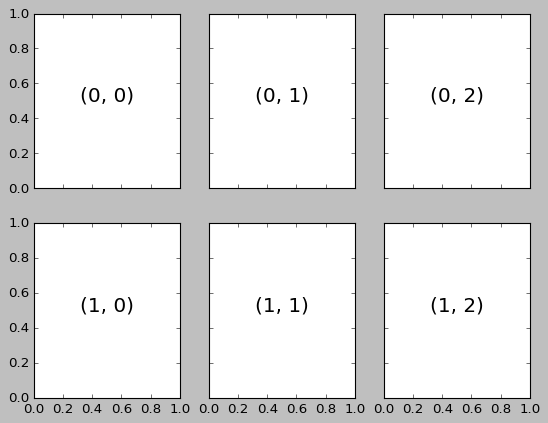

In [40]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## plt.GridSpec: More Complicated Arrangements
interface for plt.subplot or ax.add_subplot() function

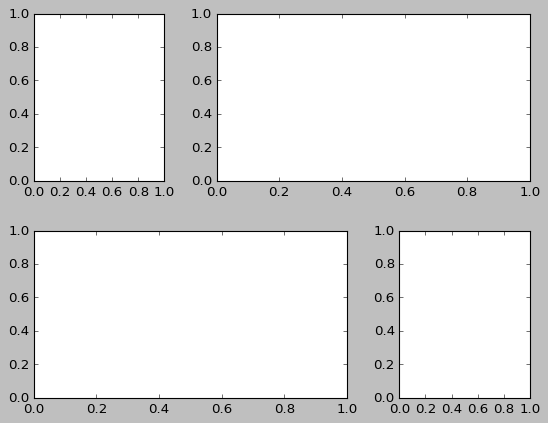

In [41]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

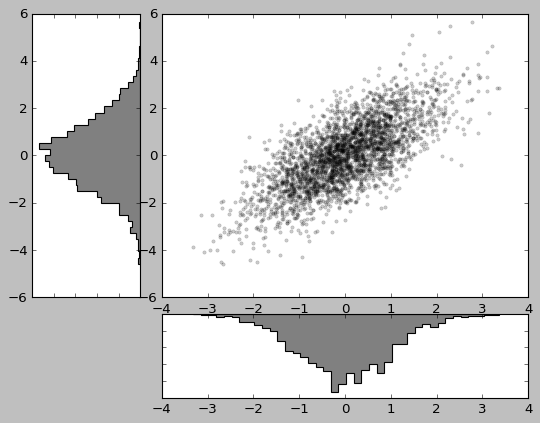

In [42]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T


grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = plt.subplot(grid[:-1, 1:])
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
y_hist = plt.subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()
x_hist = plt.subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()


## Text and annotation
plt.text/ax.text command, which will place text at a particular x/y value, takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.
### Transform
 - ax.transData: Transform associated with data coordinates
 - ax.transAxes: Transform associated with the axes (in units of axes dimensions)
 - fig.transFigure: Transform associated with the figure (in units of figure dimensions)


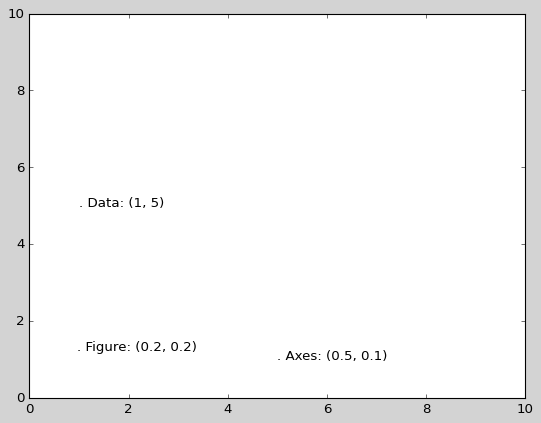

In [43]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

## Arrows and Annotation
plt.annotate() function

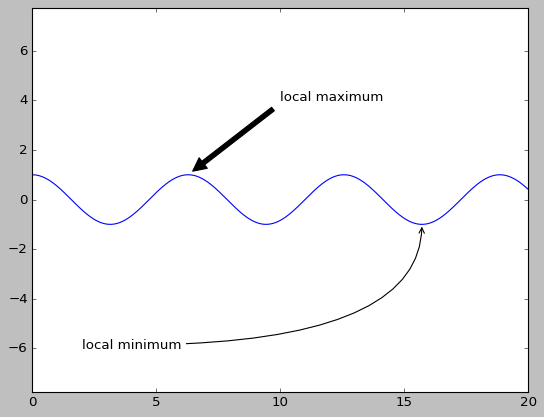

In [44]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            #arrow style controlled with dictionary
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


## Customizing ticks
major and minor ticks,
These tick properties—locations and labels—that is, can be customized by setting the formatter and locator objects of each axis

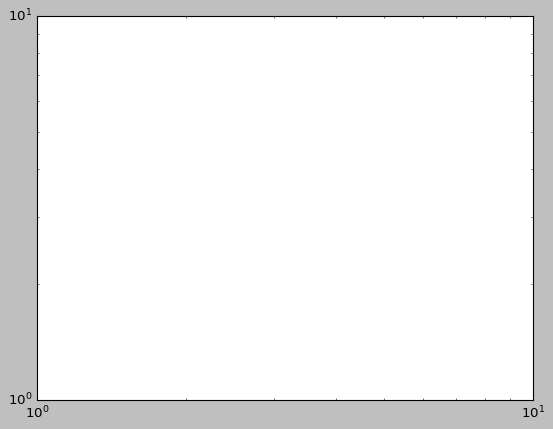

In [45]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

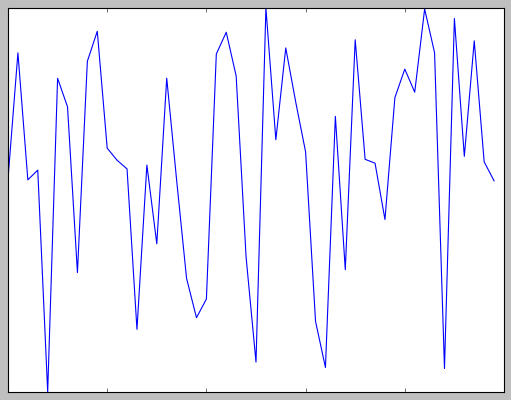

In [46]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

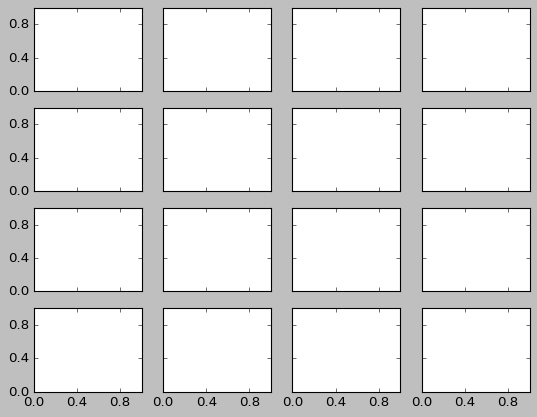

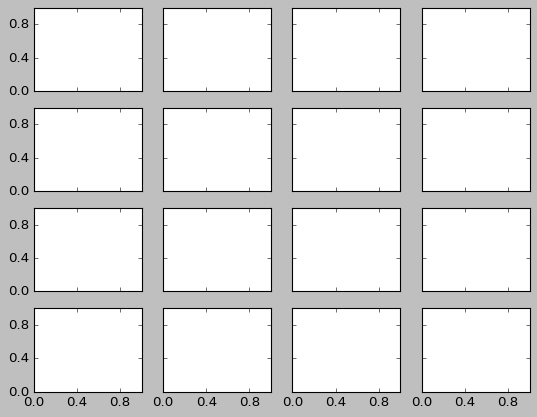

In [47]:
#plt.MaxNLocator() specify maximum number of ticks
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

Summary on locators and formatters

Each of the following is available in the plt namespace:

Locator class	Description

- `NullLocator`	No ticks
- `FixedLocator`	Tick locations are fixed
- `IndexLocator`	Locator for index plots (e.g., where x = range(len(y)))
- `LinearLocator`	Evenly spaced ticks from min to max
- `LogLocator`	Logarithmically ticks from min to max
- `MultipleLocator`	Ticks and range are a multiple of base
- `MaxNLocator`	Finds up to a max number of ticks at nice locations
- `AutoLocator`	(Default.) MaxNLocator with simple defaults.
- `AutoMinorLocator`	Locator for minor ticks

Formatter Class	Description

- `NullFormatter`	No labels on the ticks
- `IndexFormatter`	Set the strings from a list of labels
- `FixedFormatter`	Set the strings manually for the labels
- `FuncFormatter`	User-defined function sets the labels
- `FormatStrFormatter`	Use a format string for each value
- `ScalarFormatter`	(Default.) Formatter for scalar values
- `LogFormatter`	Default formatter for log axes

# Changing the Defaults: rcParams
We'll start by saving a copy of the current rcParams dictionary, so we can easily reset these changes in the current session:

In [48]:
IPython_default = plt.rcParams.copy()

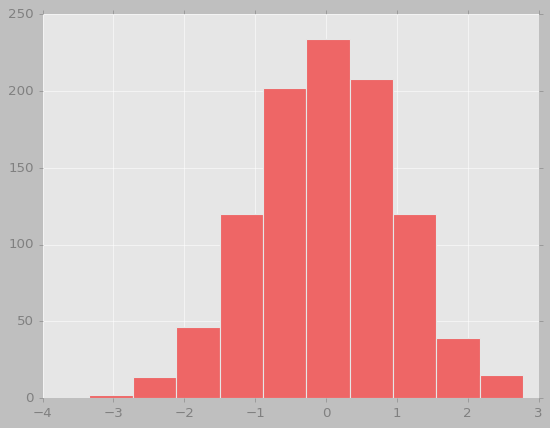

In [49]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
x = np.random.randn(1000)
plt.hist(x);

## Stylesheets
plt.style.available to find all variants


In [50]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

The basic way to switch to a stylesheet is to call

`plt.style.use('stylename')`


But keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily:

`with plt.style.context('stylename'):
    make_a_plot()`

In [3]:
# reset rcParams
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
# create a map of SAT scores
fig,ax = plt.subplots(1, figsize=(25, 15))
merged['coords'] = merged['geometry'].apply(lambda x:x.representative_point().coords[:])
merged.plot(column='sat_score', ax=ax, cmap='inferno', figsize=(16,10), legend=True,  missing_kwds={'color': 'lightgrey'})

# delete axis
ax.axis('off')

# add a title
ax.set_title('Average SAT scores for different zip code locations of New York', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: NYC OpenData portal 2014', xy=(-74.2, 40.50), fontsize=10)

https://matplotlib.org/stable/tutorials/introductory/customizing.html